Iteración 1: Error absoluto = 2.274689, Error relativo = 0.369294, Error cuadrático = 1.083667
Iteración 2: Error absoluto = 0.316355, Error relativo = 0.051360, Error cuadrático = 0.161502
Iteración 3: Error absoluto = 0.096038, Error relativo = 0.015592, Error cuadrático = 0.047124
Iteración 4: Error absoluto = 0.019765, Error relativo = 0.003209, Error cuadrático = 0.010259
Iteración 5: Error absoluto = 0.001988, Error relativo = 0.000323, Error cuadrático = 0.000998
Iteración 6: Error absoluto = 0.000522, Error relativo = 0.000085, Error cuadrático = 0.000267
Iteración 7: Error absoluto = 0.000244, Error relativo = 0.000040, Error cuadrático = 0.000114
Iteración 8: Error absoluto = 0.000042, Error relativo = 0.000007, Error cuadrático = 0.000020
Iteración 9: Error absoluto = 0.000005, Error relativo = 0.000001, Error cuadrático = 0.000003
Iteración 10: Error absoluto = 0.000002, Error relativo = 0.000000, Error cuadrático = 0.000001
Iteración 11: Error absoluto = 0.000000, Error re

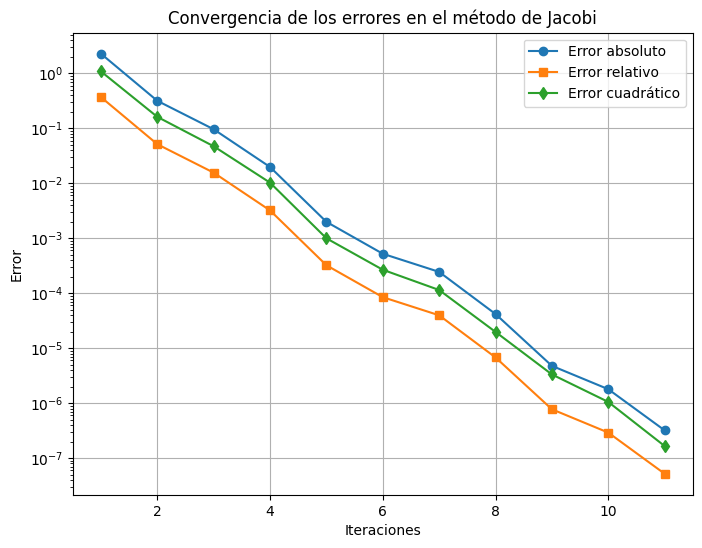

Solución aproximada: [ 0.94264122  1.64310078 -0.8916556   2.32562254 -0.35654374]
Solución exacta: [ 0.94264133  1.64310162 -0.89165585  2.32562257 -0.35654432]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el sistema de ecuaciones
A = np.array([
    [10, -1, 2, 0, 0],
    [-1, 11, -1, 3, 0],
    [2, -1, 10, -1, 0],
    [0, -1, 3, 8, -2],
    [0, 0, 2, -2, 10]
])

b = np.array([6, 25, -11, 15, -10])

# Solución exacta para comparar errores
sol_exacta = np.linalg.solve(A, b)

# Criterio de paro
tolerancia = 1e-6
max_iter = 100

# Implementación del método de Jacobi
def jacobi(A, b, tol, max_iter):
    n = len(A)
    x = np.zeros(n)  # Aproximación inicial
    errores_abs = []
    errores_rel = []
    errores_cuad = []

    for k in range(max_iter):
        x_new = np.zeros(n)
        for i in range(n):
            suma = sum(A[i, j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - suma) / A[i, i]

        # Calcular errores
        error_abs = np.linalg.norm(x_new - sol_exacta, ord=1)
        error_rel = np.linalg.norm(x_new - sol_exacta, ord=1) / np.linalg.norm(sol_exacta, ord=1)
        error_cuad = np.linalg.norm(x_new - sol_exacta, ord=2)

        errores_abs.append(error_abs)
        errores_rel.append(error_rel)
        errores_cuad.append(error_cuad)

        # Imprimir errores de la iteración
        print(f"Iteración {k+1}: Error absoluto = {error_abs:.6f}, Error relativo = {error_rel:.6f}, Error cuadrático = {error_cuad:.6f}")

        # Criterio de convergencia
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break

        x = x_new

    return x, errores_abs, errores_rel, errores_cuad, k+1

# Ejecutar el método de Jacobi
sol_aprox, errores_abs, errores_rel, errores_cuad, iteraciones = jacobi(A, b, tolerancia, max_iter)

# Graficar los errores
plt.figure(figsize=(8, 6))
plt.plot(range(1, iteraciones+1), errores_abs, label="Error absoluto", marker='o')
plt.plot(range(1, iteraciones+1), errores_rel, label="Error relativo", marker='s')
plt.plot(range(1, iteraciones+1), errores_cuad, label="Error cuadrático", marker='d')
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.yscale("log")
plt.title("Convergencia de los errores en el método de Jacobi")
plt.legend()
plt.grid()
plt.savefig("errores_jacobi.png")  # Guardar la figura en archivo PNG
plt.show()

# Mostrar la solución aproximada
print(f"Solución aproximada: {sol_aprox}")
print(f"Solución exacta: {sol_exacta}")

Iteración 1: Error absoluto = 2.683834, Error relativo = 0.354421, Error cuadrático = 1.217011
Iteración 2: Error absoluto = 0.516471, Error relativo = 0.068204, Error cuadrático = 0.257134
Iteración 3: Error absoluto = 0.181202, Error relativo = 0.023929, Error cuadrático = 0.079718
Iteración 4: Error absoluto = 0.035044, Error relativo = 0.004628, Error cuadrático = 0.016980
Iteración 5: Error absoluto = 0.012987, Error relativo = 0.001715, Error cuadrático = 0.005859
Iteración 6: Error absoluto = 0.003057, Error relativo = 0.000404, Error cuadrático = 0.001512
Iteración 7: Error absoluto = 0.000914, Error relativo = 0.000121, Error cuadrático = 0.000431
Iteración 8: Error absoluto = 0.000251, Error relativo = 0.000033, Error cuadrático = 0.000125
Iteración 9: Error absoluto = 0.000080, Error relativo = 0.000011, Error cuadrático = 0.000039
Iteración 10: Error absoluto = 0.000024, Error relativo = 0.000003, Error cuadrático = 0.000011
Iteración 11: Error absoluto = 0.000007, Error re

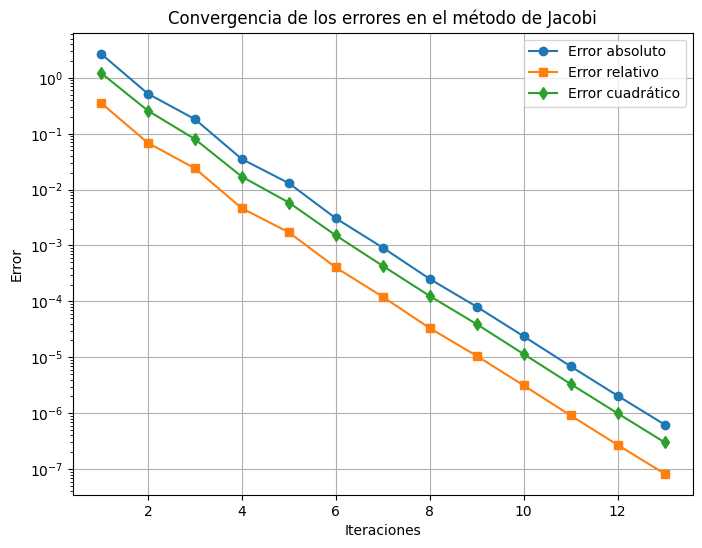

Solución aproximada: [ 0.76054273  1.17184161 -1.57196819  0.99679925 -1.21370831  1.85757855]
Solución exacta: [ 0.76054338  1.17184223 -1.57196854  0.9967994  -1.21370812  1.85757844]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el sistema de ecuaciones
A = np.array([
    [8, 2, -1, 0, 0, 0],
    [3, 15, -2, 1, 0, 0],
    [0, -2, 12, 2, -1, 0],
    [0, 1, -1, 9, -2, 1],
    [0, 0, -2, 3, 14, 1],
    [0, 0, 0, 1, -2, 10]
])

b = np.array([10, 24, -18, 16, -9, 22])

# Solución exacta para comparar errores
sol_exacta = np.linalg.solve(A, b)

# Criterio de paro
tolerancia = 1e-6
max_iter = 100

# Implementación del método de Jacobi
def jacobi(A, b, tol, max_iter):
    n = len(A)
    x = np.zeros(n)  # Aproximación inicial
    errores_abs = []
    errores_rel = []
    errores_cuad = []

    for k in range(max_iter):
        x_new = np.zeros(n)
        for i in range(n):
            suma = sum(A[i, j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - suma) / A[i, i]

        # Calcular errores
        error_abs = np.linalg.norm(x_new - sol_exacta, ord=1)
        error_rel = np.linalg.norm(x_new - sol_exacta, ord=1) / np.linalg.norm(sol_exacta, ord=1)
        error_cuad = np.linalg.norm(x_new - sol_exacta, ord=2)

        errores_abs.append(error_abs)
        errores_rel.append(error_rel)
        errores_cuad.append(error_cuad)

        # Imprimir errores de la iteración
        print(f"Iteración {k+1}: Error absoluto = {error_abs:.6f}, Error relativo = {error_rel:.6f}, Error cuadrático = {error_cuad:.6f}")

        # Criterio de convergencia
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break

        x = x_new

    return x, errores_abs, errores_rel, errores_cuad, k+1

# Ejecutar el método de Jacobi
sol_aprox, errores_abs, errores_rel, errores_cuad, iteraciones = jacobi(A, b, tolerancia, max_iter)

# Graficar los errores
plt.figure(figsize=(8, 6))
plt.plot(range(1, iteraciones+1), errores_abs, label="Error absoluto", marker='o')
plt.plot(range(1, iteraciones+1), errores_rel, label="Error relativo", marker='s')
plt.plot(range(1, iteraciones+1), errores_cuad, label="Error cuadrático", marker='d')
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.yscale("log")
plt.title("Convergencia de los errores en el método de Jacobi")
plt.legend()
plt.grid()
plt.savefig("errores_jacobi_ejercicio2.png")  # Guardar la figura en archivo PNG
plt.show()

# Mostrar la solución aproximada y la exacta
print(f"Solución aproximada: {sol_aprox}")
print(f"Solución exacta: {sol_exacta}")

<ipython-input-13-10929c48b0e2>:38: RuntimeWarning: divide by zero encountered in scalar divide
  error_rel = np.linalg.norm(x_new - x, ord=1) / np.linalg.norm(x, ord=1)


Iteración 1: Error absoluto = 18.950884, Error relativo = inf, Error cuadrático = 12.904641
Iteración 2: Error absoluto = 5.627894, Error relativo = 0.296973, Error cuadrático = 2.973344
Iteración 3: Error absoluto = 3.911892, Error relativo = 0.264259, Error cuadrático = 2.703836
Iteración 4: Error absoluto = 0.745693, Error relativo = 0.039978, Error cuadrático = 0.348963
Iteración 5: Error absoluto = 0.669941, Error relativo = 0.036094, Error cuadrático = 0.417906
Iteración 6: Error absoluto = 0.190538, Error relativo = 0.009931, Error cuadrático = 0.105357
Iteración 7: Error absoluto = 0.098758, Error relativo = 0.005126, Error cuadrático = 0.061391
Iteración 8: Error absoluto = 0.040289, Error relativo = 0.002081, Error cuadrático = 0.029677
Iteración 9: Error absoluto = 0.015726, Error relativo = 0.000811, Error cuadrático = 0.010138
Iteración 10: Error absoluto = 0.008644, Error relativo = 0.000445, Error cuadrático = 0.006779
Iteración 11: Error absoluto = 0.003032, Error relat

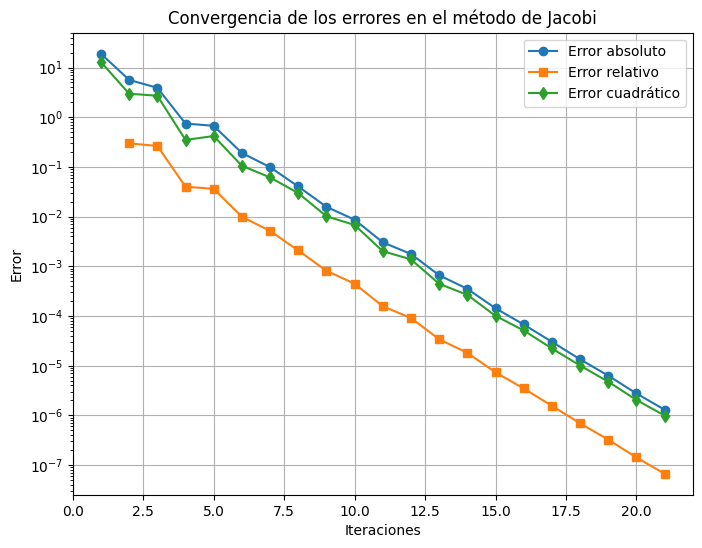

Solución aproximada: [ 2.05136268  2.20670325 -0.20294567  0.31082353  0.91999876 13.72458543]


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el sistema de ecuaciones del ejemplo (ajustado a 6 ecuaciones y 6 incógnitas)
A = np.array([[12, -2, 1, 0, 0, 0],
              [-3, 18, -4, 2, 0, 0],
              [1, -2, 16, -1, 1, 0],
              [0, 2, -1, 11, -3, 1],
              [0, 0, -2, 4, 15, -2],
              [0, 0, 0, 1, -3, 2]])

b = np.array([20, 35, -5, 19, -12, 25])

# No se puede calcular la solución exacta con un sistema subdeterminado directamente,
# pero se puede usar np.linalg.solve si el sistema es cuadrado.
# Si deseas ver la solución exacta, verifica si el sistema es cuadrado.

# Criterio de paro
tolerancia = 1e-6
max_iter = 100

# Implementación del método de Jacobi
def jacobi(A, b, tol, max_iter):
    n = len(A)
    x = np.zeros(n)  # Aproximación inicial
    errores_abs = []
    errores_rel = []
    errores_cuad = []

    for k in range(max_iter):
        x_new = np.zeros(n)
        for i in range(n):
            suma = sum(A[i, j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - suma) / A[i, i]

        # Calcular errores
        error_abs = np.linalg.norm(x_new - x, ord=1)
        error_rel = np.linalg.norm(x_new - x, ord=1) / np.linalg.norm(x, ord=1)
        error_cuad = np.linalg.norm(x_new - x, ord=2)

        errores_abs.append(error_abs)
        errores_rel.append(error_rel)
        errores_cuad.append(error_cuad)

        # Imprimir errores de la iteración
        print(f"Iteración {k+1}: Error absoluto = {error_abs:.6f}, Error relativo = {error_rel:.6f}, Error cuadrático = {error_cuad:.6f}")

        # Criterio de convergencia
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break

        x = x_new

    return x, errores_abs, errores_rel, errores_cuad, k+1

# Ejecutar el método de Jacobi
sol_aprox, errores_abs, errores_rel, errores_cuad, iteraciones = jacobi(A, b, tolerancia, max_iter)

# Graficar los errores
plt.figure(figsize=(8,6))
plt.plot(range(1, iteraciones+1), errores_abs, label="Error absoluto", marker='o')
plt.plot(range(1, iteraciones+1), errores_rel, label="Error relativo", marker='s')
plt.plot(range(1, iteraciones+1), errores_cuad, label="Error cuadrático", marker='d')
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.yscale("log")
plt.title("Convergencia de los errores en el método de Jacobi")
plt.legend()
plt.grid()
plt.savefig("errores_jacobi.png")  # Guardar la figura en archivo PNG
plt.show()

# Mostrar la solución aproximada
print(f"Solución aproximada: {sol_aprox}")
